# Credit Card Fraud Detection


---



---



**카드 결제 기록 중 이상거래를 탐지하기 위한 모델을 구축하기 위한 프로젝트**

**데이터**

*   캐글의 Credit Card Fraud Detection 데이터 활용(https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data)
*   284807행 x 31 열
  *   Time: 첫 번째 거래와 각 거래 사이의 경과 시간(초)
  *   V1~V28: PCA 적용이 된 후의 데이터
  *   Amount: 거래 금액
  *   Class: 이상거래(1), 정상거래(0)

**목차**
1. Load Data
2. EDA
3. Data Preprocessing\
  Split data\
  Imbalance Problem\
  Standardization
4. Build Model\
  4.1 Logistic Regression\
  4.2 Random Forest Classifier\
  4.3 Support Vector Machine\
  4.4 XGBoost Classifier\
  4.5 Neural Network\
  4.6 Select Model
5. Tuning Hyperparameter
6. Conclusion



# Load Data

In [75]:
#Kaggle에서 데이터 바로 불러오기
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shazelp","key":"78f56148220b9c54c97bf280be888f6d"}'}

In [76]:
#Kaggle에서 데이터 바로 불러오기
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets list

ref                                                title                                     size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------  ---------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/students-performance-dataset        📚 Students Performance Dataset 📚          66KB  2024-06-12 23:09:20          14190        293  1.0              
nelgiriyewithana/most-streamed-spotify-songs-2024  Most Streamed Spotify Songs 2024         496KB  2024-06-15 18:50:51          10760        222  1.0              
ihelon/coffee-sales                                Coffee Sales                              10KB  2024-07-03 20:04:43           2935         60  1.0              
thamersekhri/euro-2024-matches                     Euro 2024 Matches Stats                    8KB  2024-07-14 21:47:17            689         37  1.0              
oleksiimartusiuk

In [77]:
#Kaggle에서 데이터 바로 불러오기
! kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [78]:
#Kaggle에서 데이터 바로 불러오기
! mkdir creditcardfraud
! unzip creditcardfraud.zip -d creditcardfraud

mkdir: cannot create directory ‘creditcardfraud’: File exists
Archive:  creditcardfraud.zip
replace creditcardfraud/creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [79]:
#Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [80]:
df = pd.read_csv('creditcardfraud/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# EDA

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [82]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- 결측치 없음

In [83]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [84]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [85]:
fraud_ratio = df[df['Class']==1].shape[0]/df.shape[0]
non_fraud_ratio = df[df['Class']==0].shape[0]/df.shape[0]

print("Fraud transaction in the dataset is {:.2f}%".format(fraud_ratio*100))
print("Normal transaction in the dataset is {:.2f}%".format(non_fraud_ratio*100))

Fraud transaction in the dataset is 0.17%
Normal transaction in the dataset is 99.83%


In [208]:
Class_count = df['Class'].value_counts()

fig = px.bar(x=Class_count.index, y=Class_count.values, color=Class_count.index,
             labels={'x': 'Class', 'y': 'Count'},
             title='Number of Fraud and Normal Transactions',
             text=Class_count.values)
fig.update_xaxes(tickvals=[0,1], ticktext=['0: Normal', '1:Fraud'])
fig.update_layout(width = 600, height=600, bargap=0.2)
fig.show()


*github 업로드 그래프 이미지*

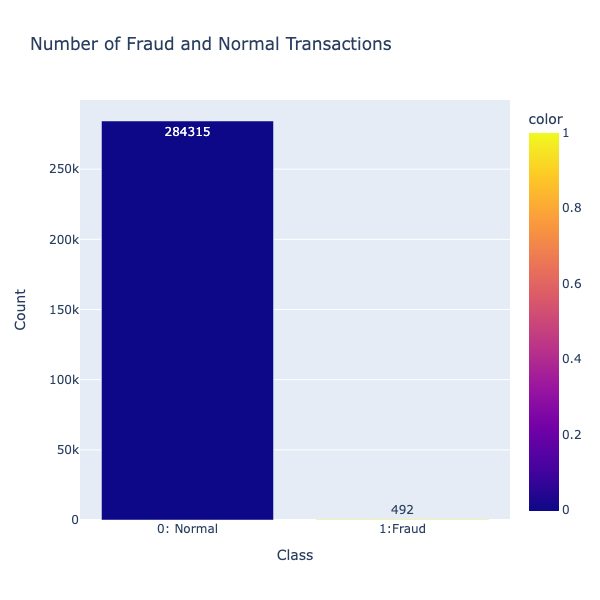

- class 변수 값의 비율과 시각화를 통해 불균형 데이터 확인 (이상거래 0.17%, 정상거래 99.83%)

**Time, Amount 변수를 제외한 V1~V28변수는 이미 PCA 가 적용된 값이라고 했으므로, 이를 시각화하여 변수사이의 상관관계를 확인해 보았다.**

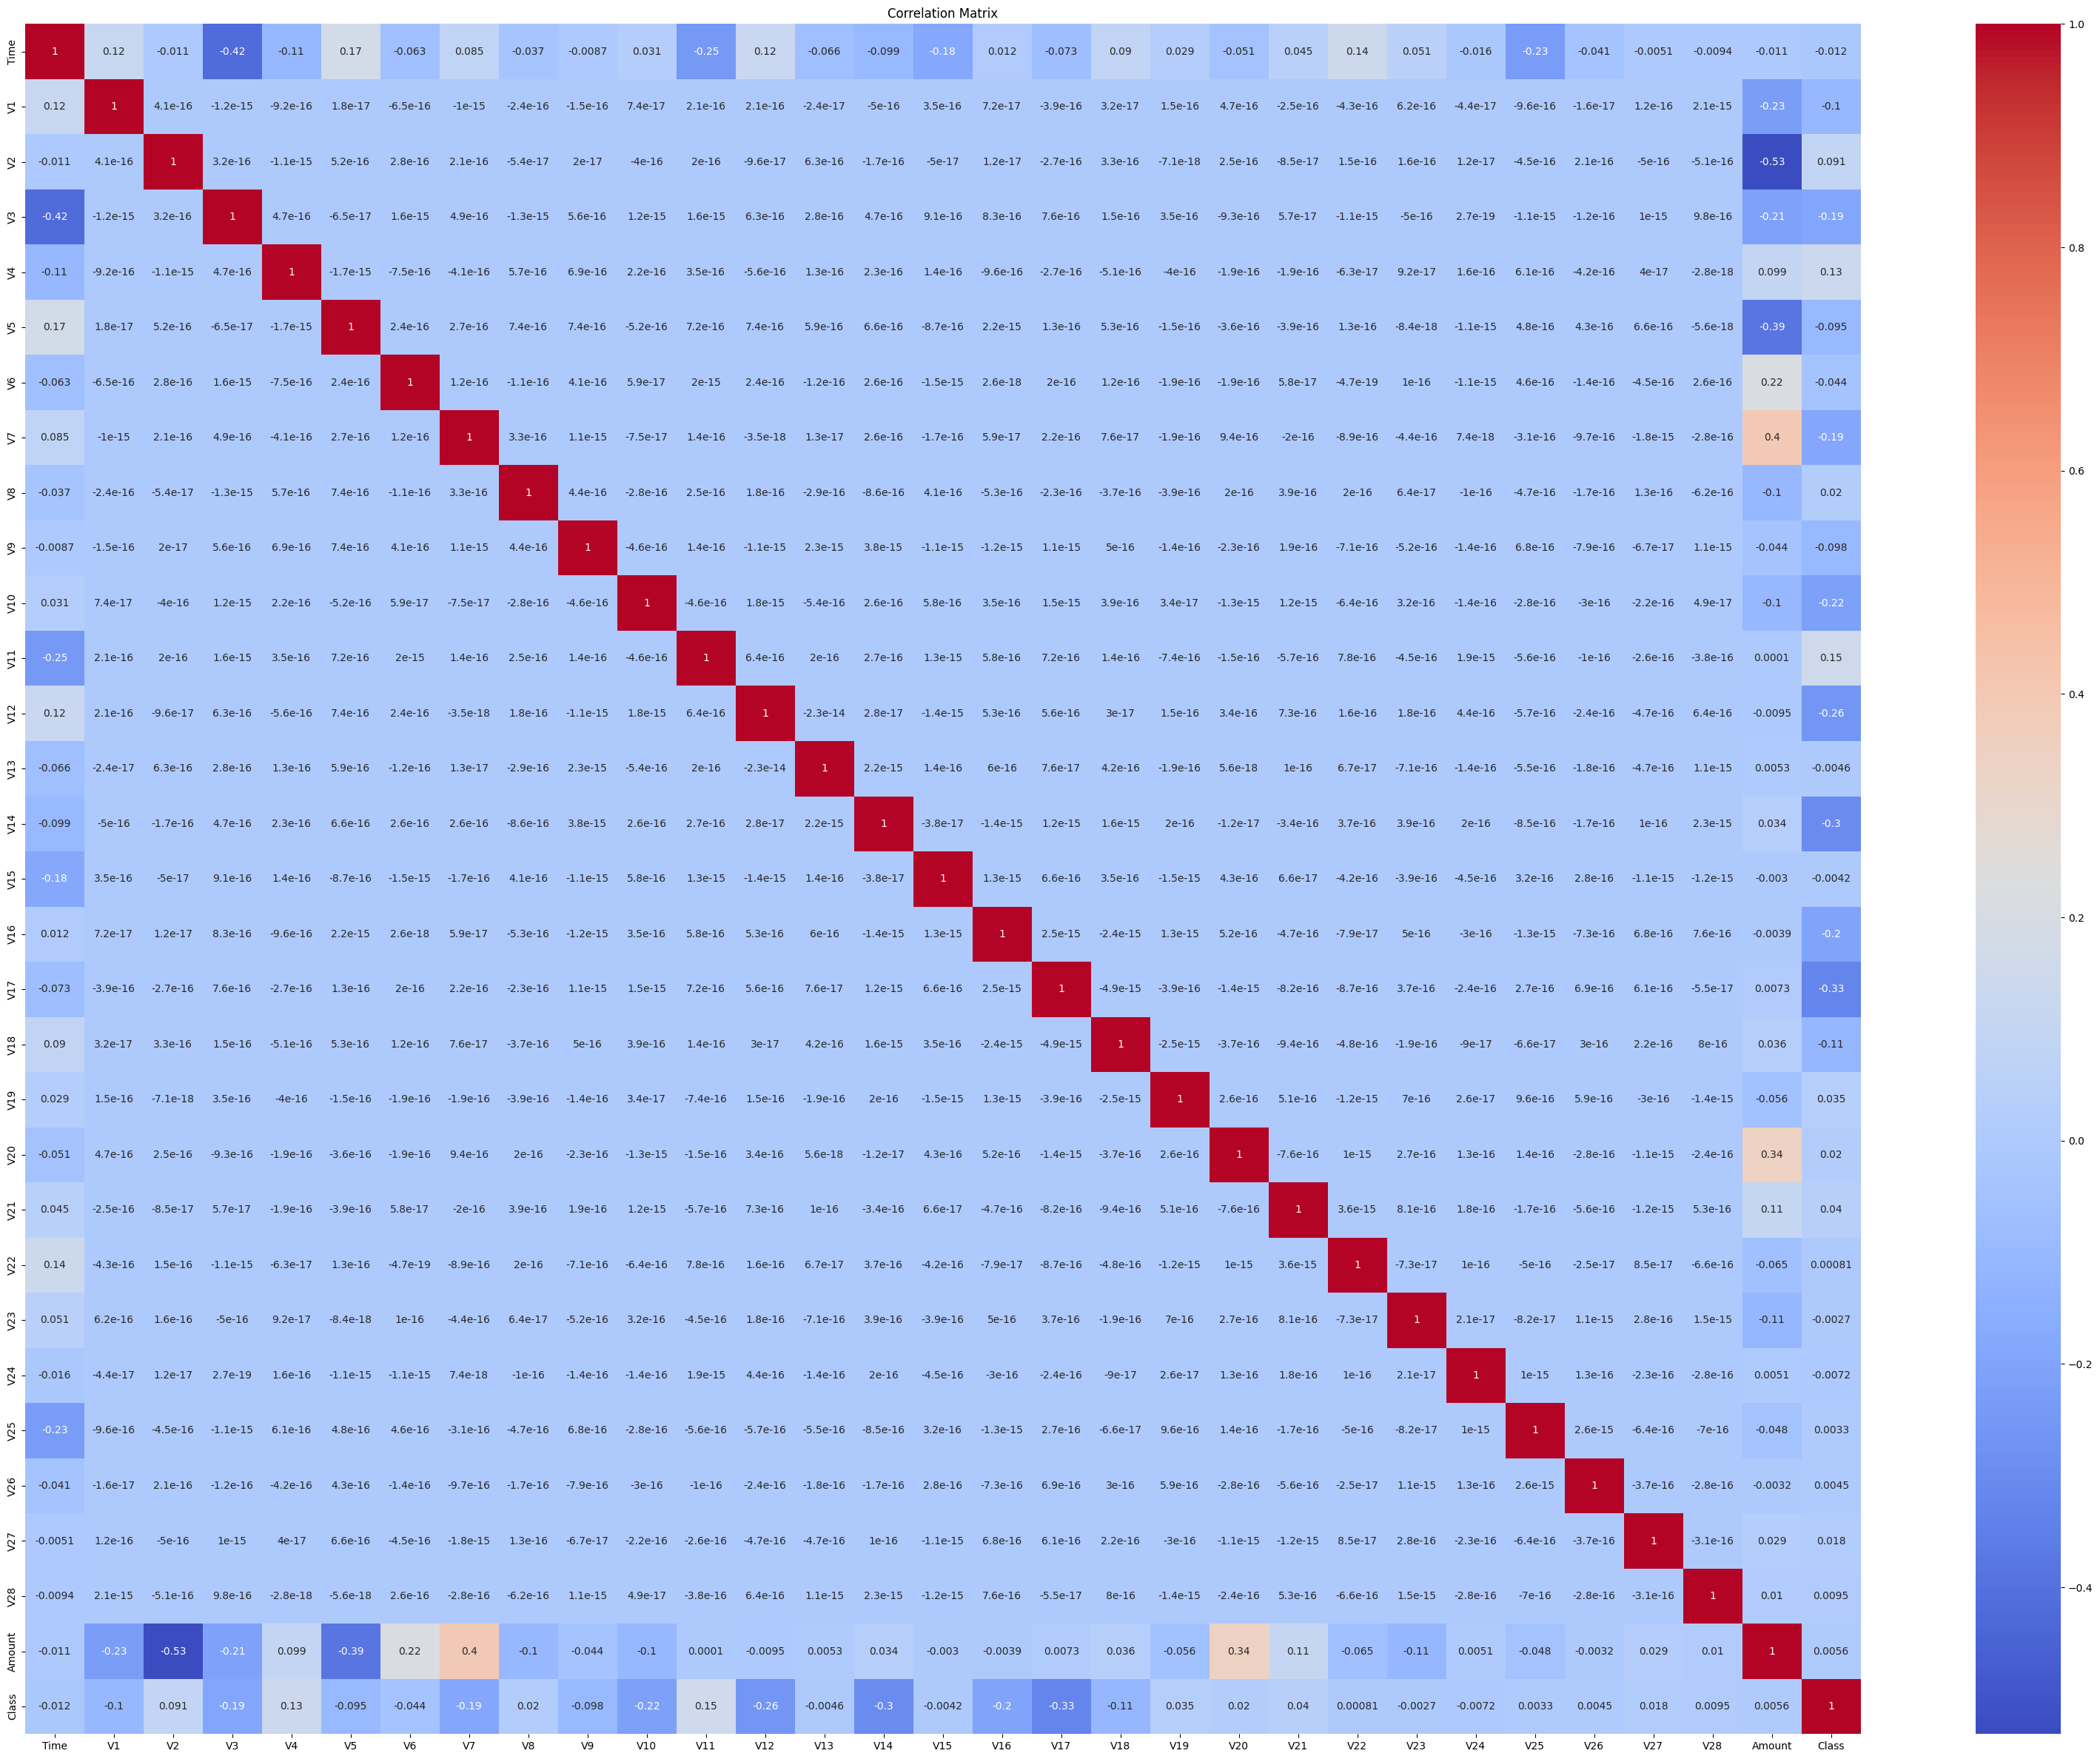

In [87]:
#heatmap 상관관계
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- V1~V28은 다른 변수들보다 PCA가 이루어지지 않은 Time, Amount, Class 와 높은상관관계를 보여주는 것을 확인

**표준화 방법을 확인하기 위해 각 변수들의 분포를 확인해 보았다.**

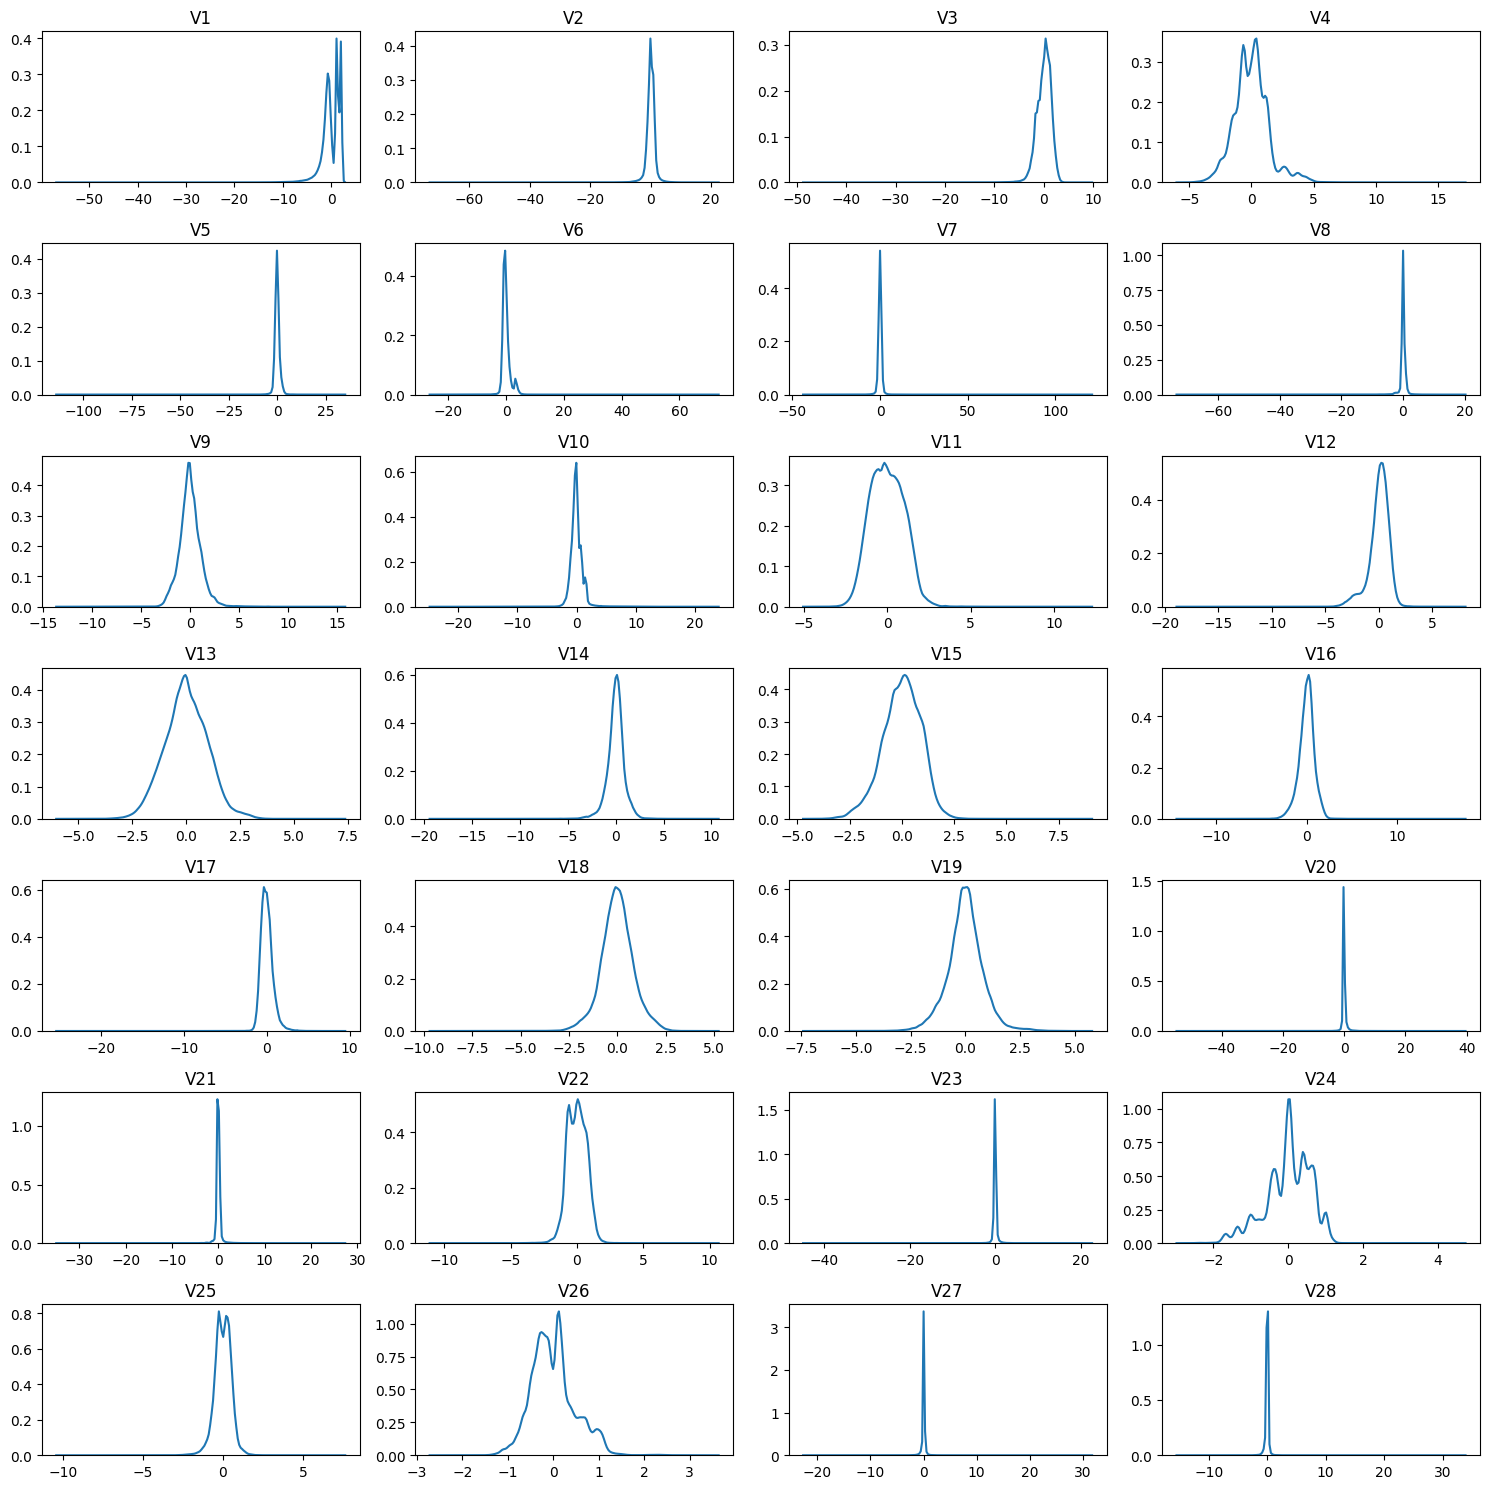

In [88]:
#V1~V28
col_pca = df.drop(['Time', 'Amount', 'Class'], axis=1).columns

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(15, 15))

for i, col in enumerate(col_pca):
    sns.kdeplot(df[col], ax=ax[i//4, i%4])
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].set_xlabel('')
    ax[i//4, i%4].set_ylabel('')

plt.tight_layout()
plt.show()

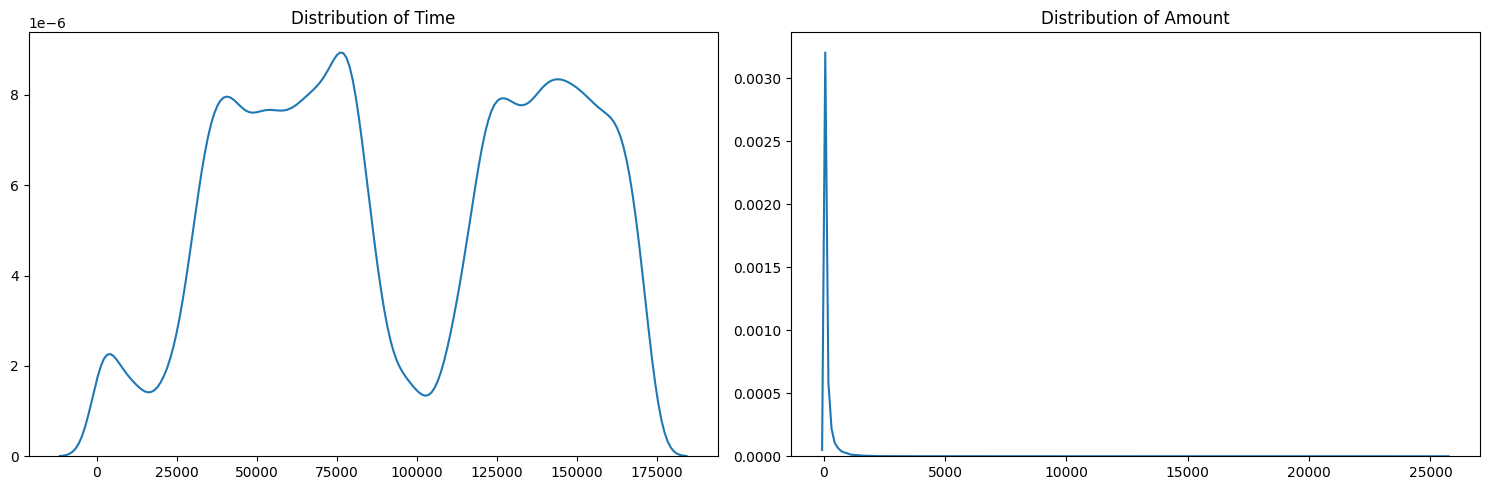

In [89]:
#Time, Amount
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.kdeplot(df['Time'], ax=ax[0])
ax[0].set_title('Distribution of Time')
ax[0].set_xlabel('')
ax[0].set_ylabel('')

sns.kdeplot(df['Amount'], ax=ax[1])
ax[1].set_title('Distribution of Amount')
ax[1].set_xlabel('')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

**이상거래(1)와 정상거래(0)를 나누어 분포도를 확인해 보았다.**

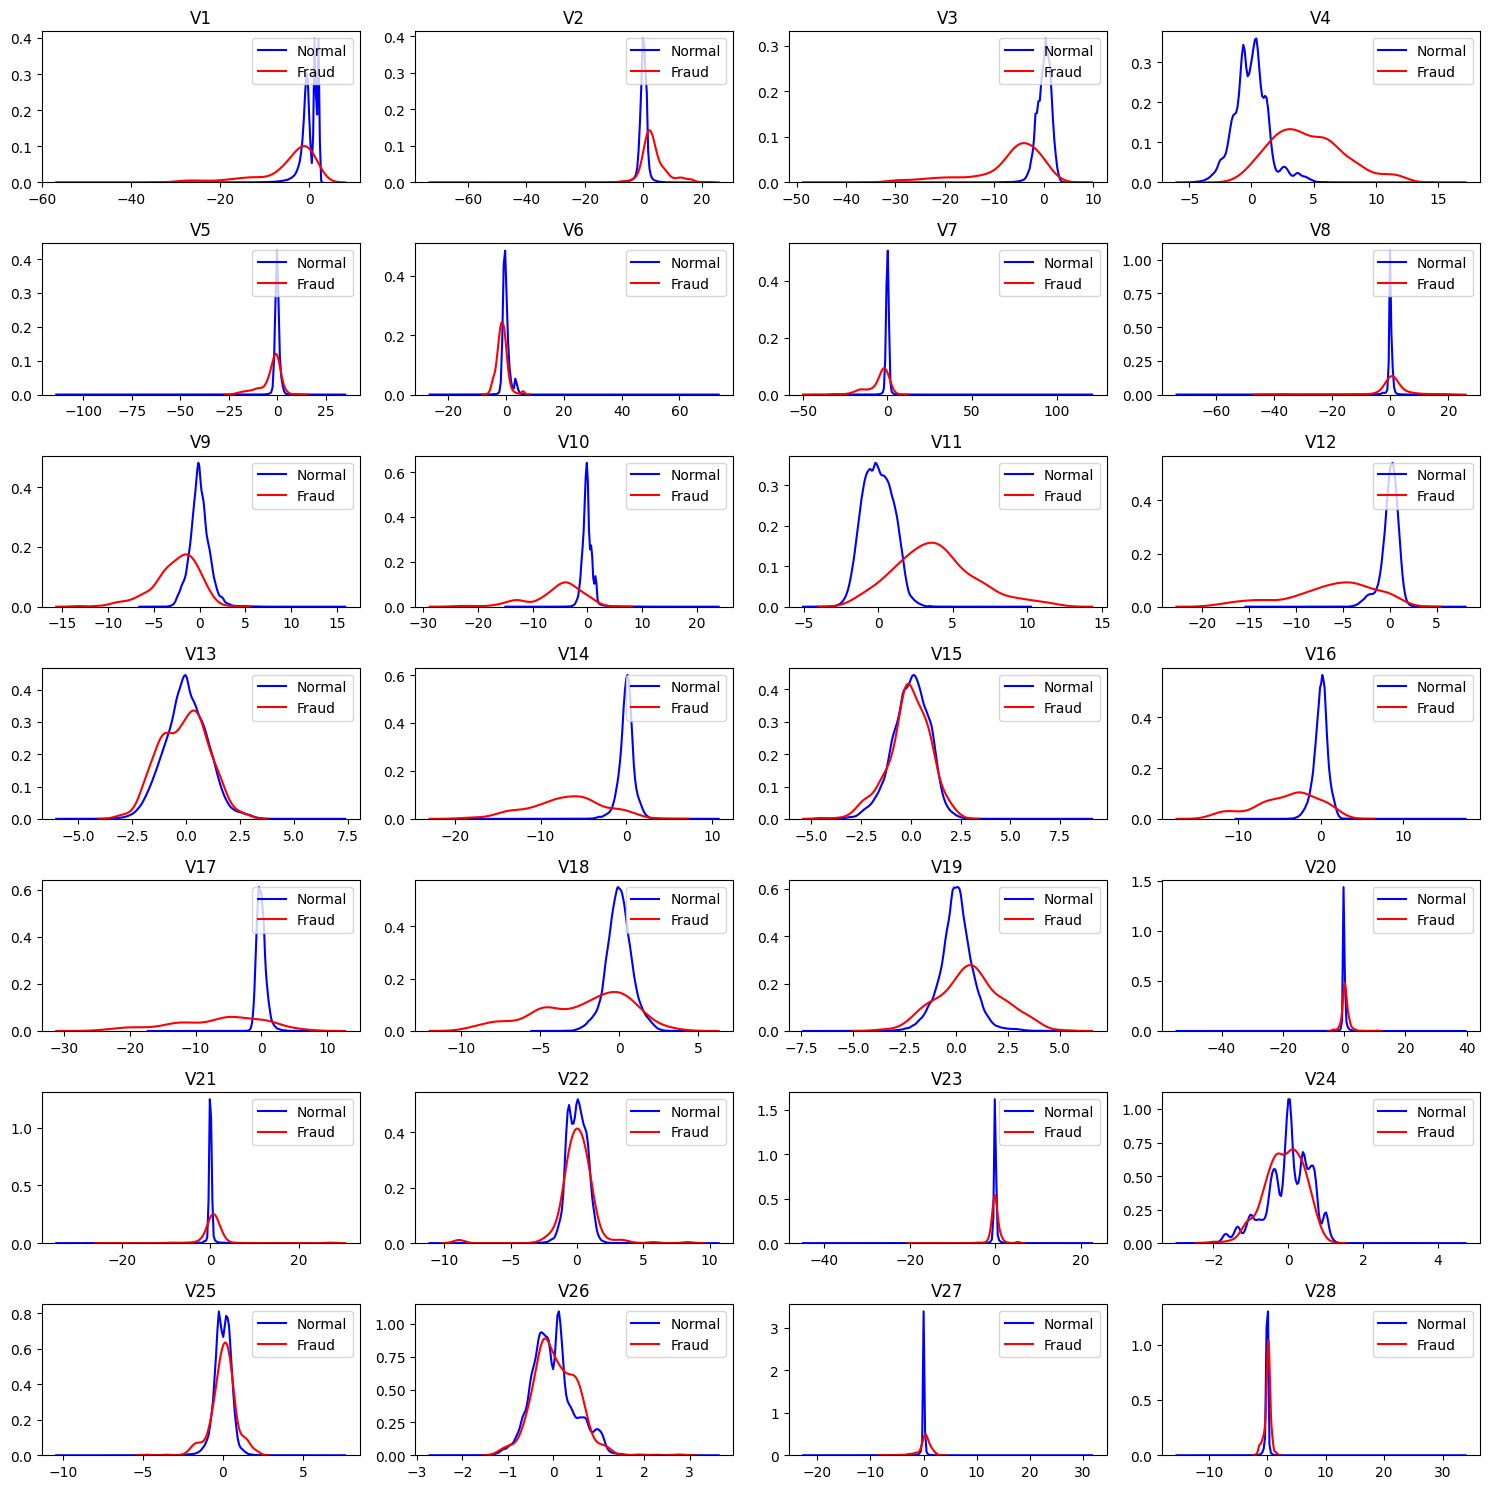

In [90]:
#V1~V28
col_pca = df.drop(['Time', 'Amount', 'Class'], axis=1).columns

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(15, 15))

for i, col in enumerate(col_pca):
    sns.kdeplot(df.loc[df['Class']==0, col], ax=ax[i//4, i%4], color='blue', label='Normal')
    sns.kdeplot(df.loc[df['Class']==1, col], ax=ax[i//4, i%4], color='red', label='Fraud')
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].set_xlabel('')
    ax[i//4, i%4].set_ylabel('')
    ax[i//4, i%4].legend(loc='upper right')

plt.tight_layout()
plt.show()

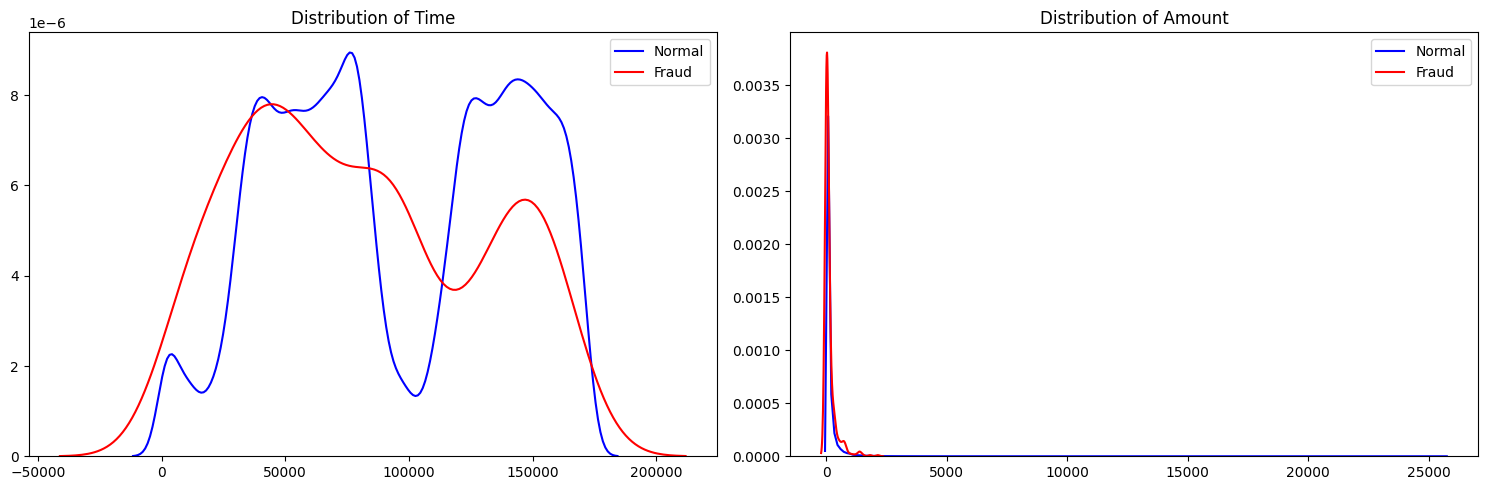

In [91]:
#Time, Amount
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))

sns.kdeplot(df.loc[df['Class']==0,'Time'], ax=ax[0], color='blue', label='Normal')
sns.kdeplot(df.loc[df['Class']==1,'Time'], ax=ax[0], color='red', label='Fraud')
ax[0].set_title('Distribution of Time')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].legend(loc='upper right')

sns.kdeplot(df.loc[df['Class']==0,'Amount'], ax=ax[1], color='blue', label='Normal')
sns.kdeplot(df.loc[df['Class']==1,'Amount'], ax=ax[1], color='red', label='Fraud')
ax[1].set_title('Distribution of Amount')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

**Boxplot 으로 이상치를 확인해 보았다.**

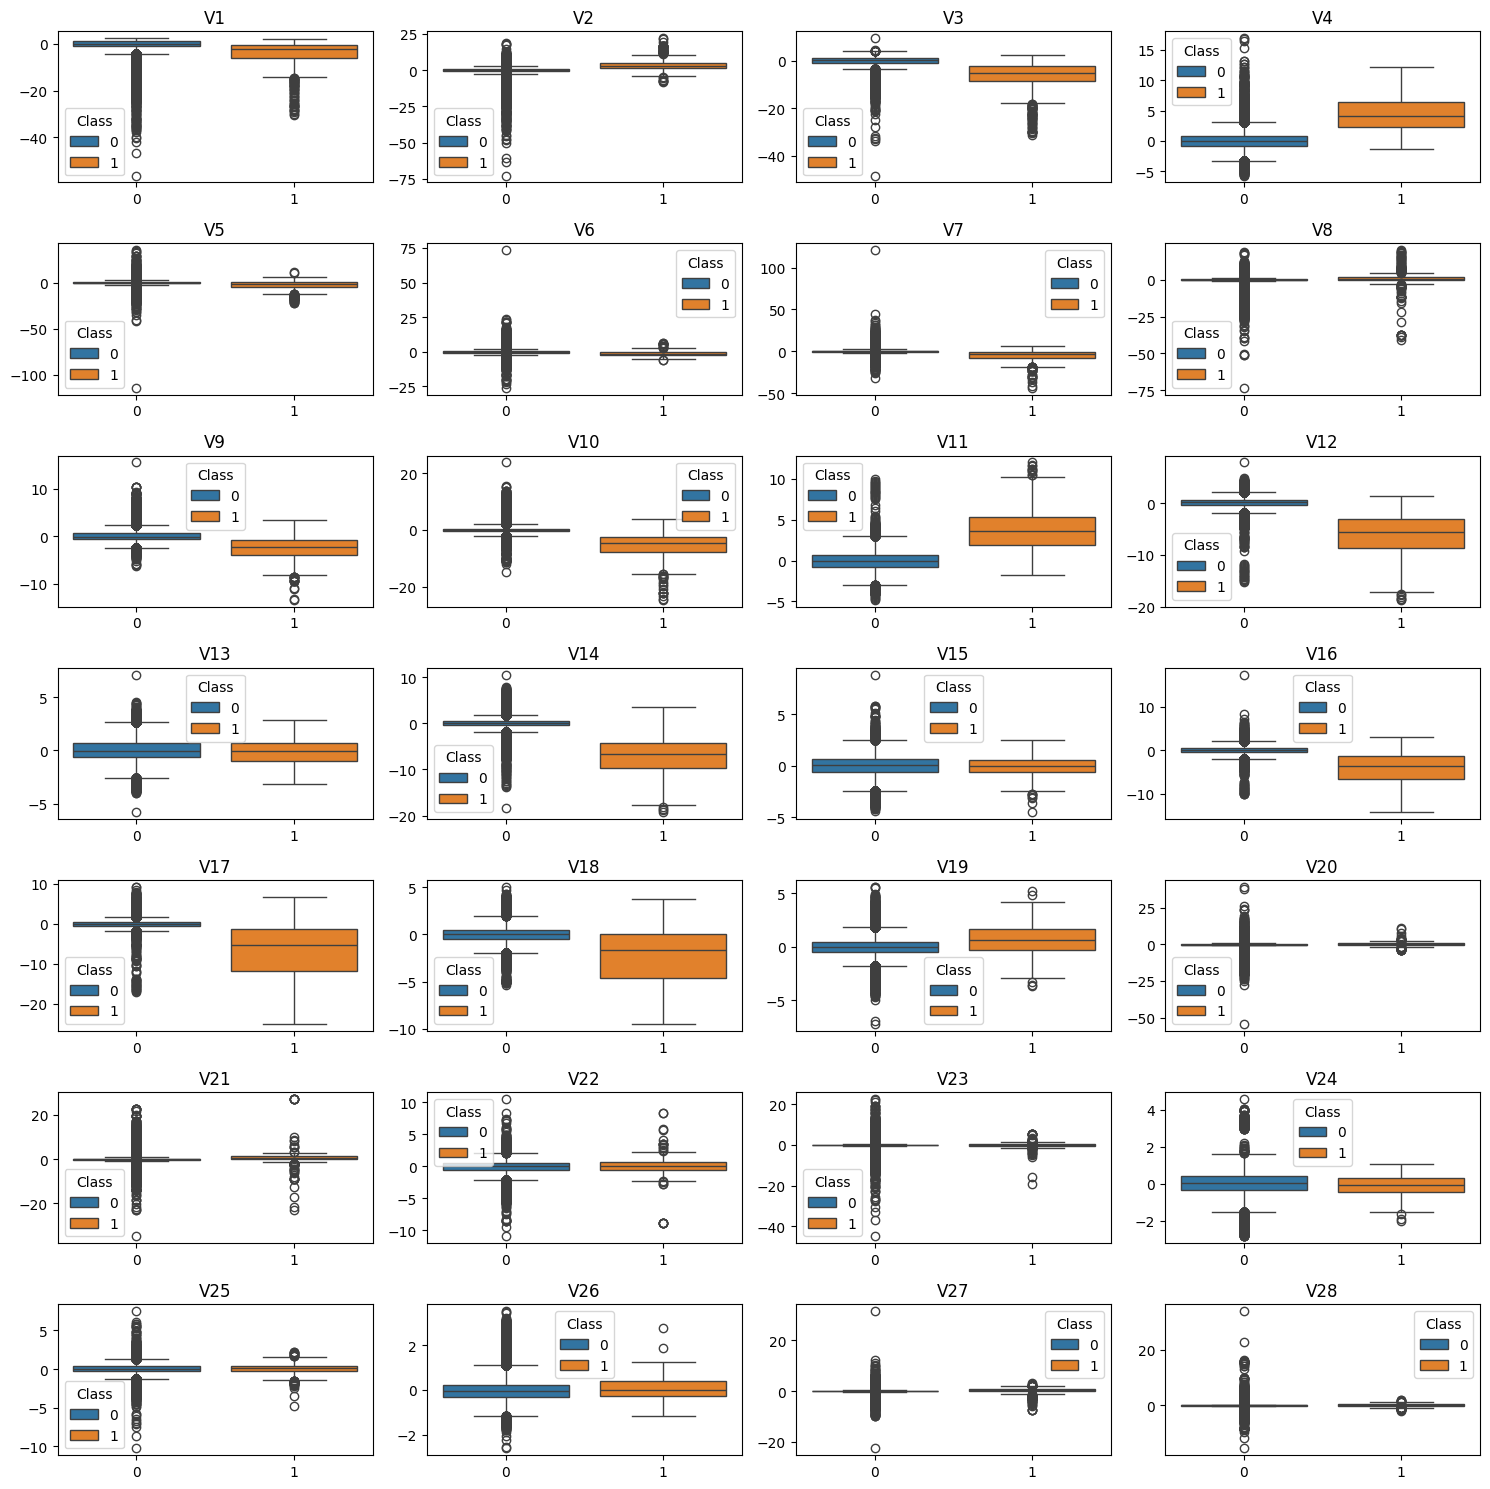

In [92]:
#V1-V28
col_pca = df.drop(['Time', 'Amount', 'Class'], axis=1).columns

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(15, 15))

for i, col in enumerate(col_pca):
    sns.boxplot(x="Class", y=df[col], data=df, ax=ax[i//4, i%4], hue="Class")
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].set_xlabel('')
    ax[i//4, i%4].set_ylabel('')

plt.tight_layout()
plt.show()

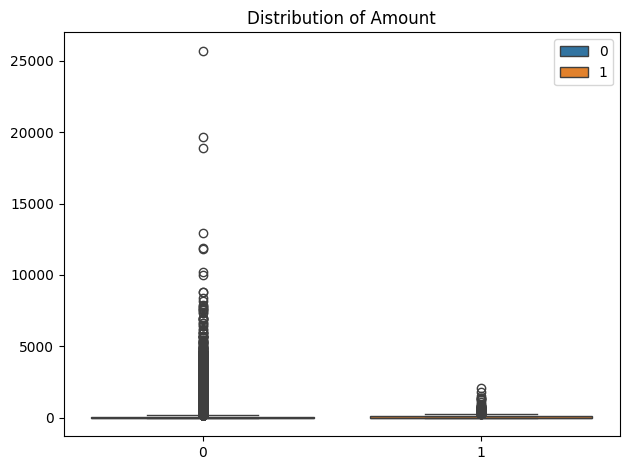

In [93]:
#Amount
sns.boxplot(x="Class", y="Amount", data=df, hue="Class")
plt.title('Distribution of Amount')
plt.xlabel('')
plt.ylabel('')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

Time과 Class를 제외한 모든 변수에서 이상치가 많이 발생하는 것을 확인할 수 있었다. 이를 해결하기 위해 표준화가 필요하다고 판단이 되었지만, Amount를 제외한 V1-V28의 경우 해당 변수들이 어떤 의미를 갖는 지 알 수 없으므로 Amount 변수만 표준화를 진행하기로 한다.



*   Amount: 이상치를 고려한 표준화 필요
*   Time: 해당 변수 제거하여 모델 훈련 예정



# DATA preprocessing

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE
from collections import Counter

## split data

In [95]:
X = df.drop(['Class', 'Time'], axis=1) #Time 변수 제거
y = df['Class']

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Imbalance problem

**target 변수인 class의 값이 불균형하므로 이를 해결하는 것이 필요하였다.
Undersampling, Oversampling, class_weight 방법 중 Undersampling의 경우 정보소실의 문제가 있기 때문에 현재 데이터의 양이 (이상 거래의 양) 충분치 못하다고 판단하여 제외하였다. 따라서 Oversampling의 SMOTE와 class_weight 를 활용하여 모델을 훈련하고 성능을 비교하기로 결정하였다.**

In [97]:
#SMOTE
smote = SMOTE(random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [98]:
print('Original dataset shape:', Counter(y_train_smote))
print('Resampled dataset shape: ', Counter(y_train_smote))

Original dataset shape: Counter({0: 227451, 1: 227451})
Resampled dataset shape:  Counter({0: 227451, 1: 227451})


## Standardization

**Amount 변수를 이상치를 고려하여 표준화하기 위해 RobustScaler 를 활용하였다.**

In [99]:
scaler = RobustScaler()

X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])
X_train_smote['Amount'] = scaler.fit_transform(X_train_smote[['Amount']])

X_test['Amount'] = scaler.transform(X_test[['Amount']])

# Modeling

- 각 모델별로 **SMOTE**를 적용한 데이터로 훈련한 결과와 일반 데이터셋에서 각 모델의 **class_weight**를 활용하여 훈련한 결과를 비교하였다.

- XGBClassifier와 Neural Network 의 경우 다른 모델과는 달리 float 형식의 값을 입력해야 하기 때문에, **class의 0과 1의 비율**을 고려하여 적용하였다.

- 모델은 0,1의 예측이 필요한 모델이기 때문에 **f1-score**를 기준으로 비교하였으며, 같은 점수일 경우 모델 목적인 신용거래 이상 탐지를 고려하여 사기거래를 잘 예측하여 놓치치 않기 위해 **recall**을 기준으로 하여 모델을 평가하였다.

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, f1_score, recall_score

In [179]:
LR = LogisticRegression(random_state=42)
LR_cw = LogisticRegression(random_state=42, class_weight='balanced')

RF = RandomForestClassifier(random_state=42)
RF_cw = RandomForestClassifier(random_state=42, class_weight='balanced')

SVM = SVC(random_state=42)
SVM_cw = SVC(random_state=42, class_weight='balanced')

ratio = y_train.value_counts()[0]/y_train.value_counts()[1]
XGB = XGBClassifier(random_state=42)
XGB_cw = XGBClassifier(random_state=42, scale_pos_weight=ratio)

## Logistic Regression

1. SMOTE

In [102]:
LR.fit(X_train_smote, y_train_smote)
y_pred = LR.predict(X_test)

In [103]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.08      0.91      0.14        98

    accuracy                           0.98     56962
   macro avg       0.54      0.94      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [104]:
f1_smote_LR = f1_score(y_test, y_pred)
recall_smote_LR = recall_score(y_test, y_pred)

print("f1-score:", f1_smote_LR)
print("recall:", recall_smote_LR)

f1-score: 0.14262820512820512
recall: 0.9081632653061225


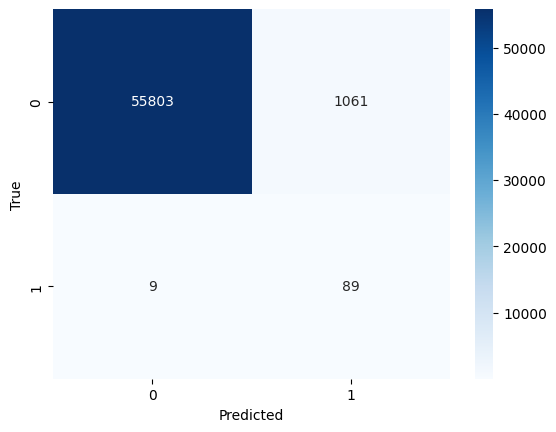

In [105]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


plot_confusion_matrix(y_test, y_pred)

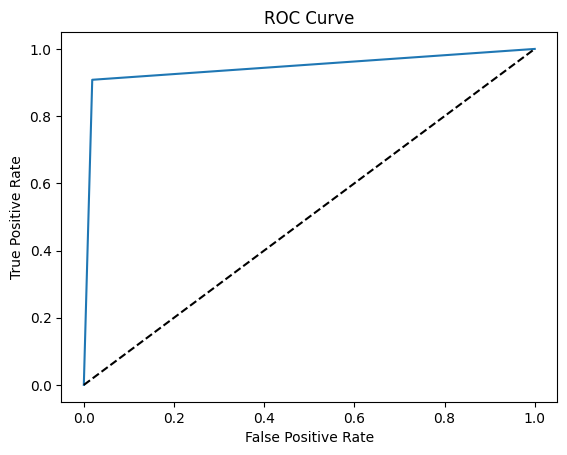

In [106]:
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()


plot_roc_curve(y_test, y_pred)

2. Class_weight

In [107]:
LR_cw.fit(X_train, y_train)
y_pred = LR_cw.predict(X_test)

In [108]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.91      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.94      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [109]:
f1_cw_LR = f1_score(y_test, y_pred)
recall_cw_LR = recall_score(y_test, y_pred)

print("f1-score:", f1_cw_LR)
print("recall:", recall_cw_LR)

f1-score: 0.12535211267605634
recall: 0.9081632653061225


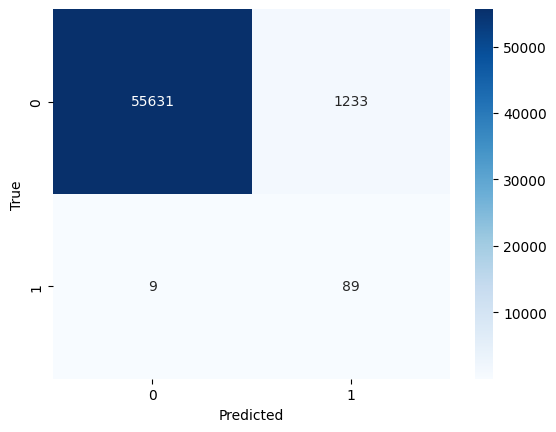

In [110]:
plot_confusion_matrix(y_test, y_pred)

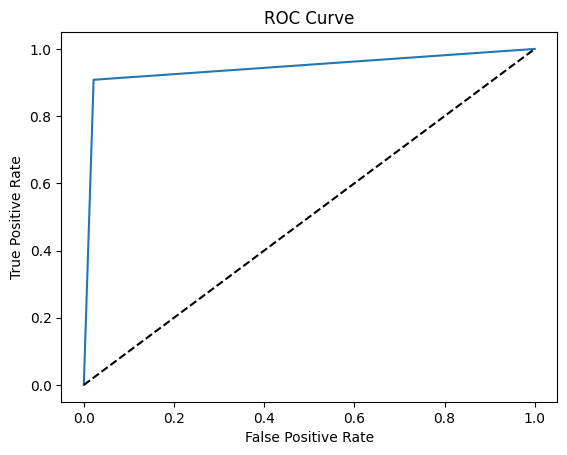

In [111]:
plot_roc_curve(y_test, y_pred)

## RandomForestClassifier

1. SMOTE

In [112]:
RF.fit(X_train_smote, y_train_smote)
y_pred = RF.predict(X_test)

In [113]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [114]:
f1_smote_RF = f1_score(y_test, y_pred)
recall_smote_RF = recall_score(y_test, y_pred)

print("f1-score:", f1_smote_RF)
print("recall:", recall_smote_RF)

f1-score: 0.8469387755102041
recall: 0.8469387755102041


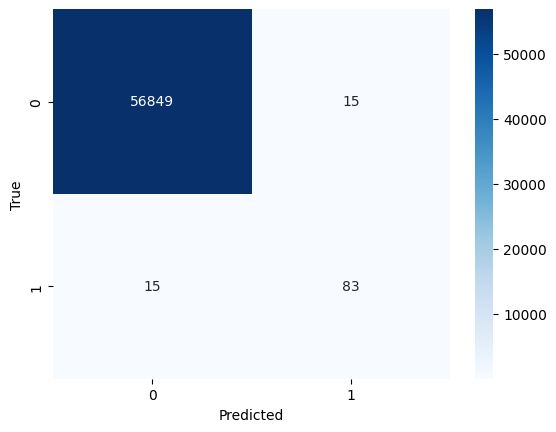

In [115]:
plot_confusion_matrix(y_test, y_pred)

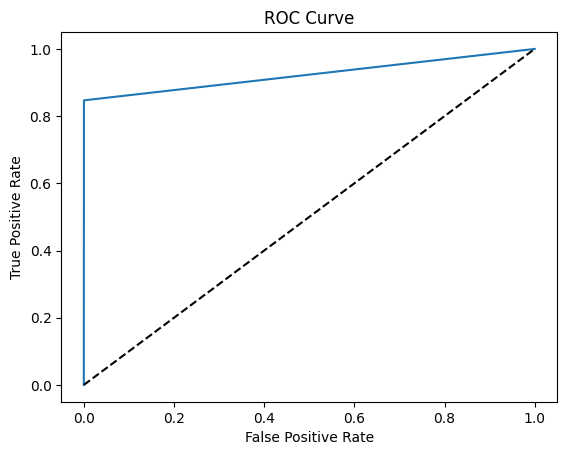

In [116]:
plot_roc_curve(y_test, y_pred)

2. class_weight

In [117]:
RF_cw.fit(X_train, y_train)
y_pred = RF_cw.predict(X_test)

In [118]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.74      0.83        98

    accuracy                           1.00     56962
   macro avg       0.97      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [119]:
f1_cw_RF = f1_score(y_test, y_pred)
recall_cw_RF = recall_score(y_test, y_pred)

print("f1-score:", f1_cw_RF)
print("recall:", recall_cw_RF)

f1-score: 0.8342857142857143
recall: 0.7448979591836735


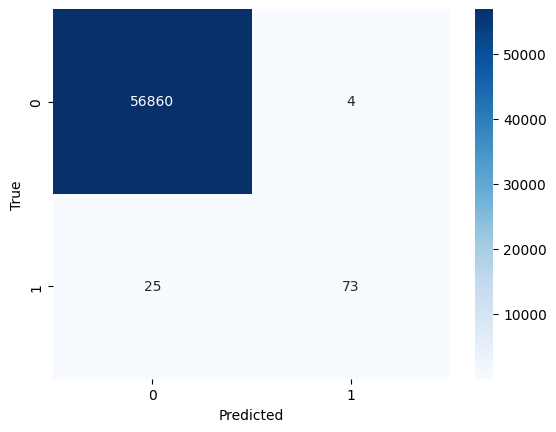

In [120]:
plot_confusion_matrix(y_test, y_pred)

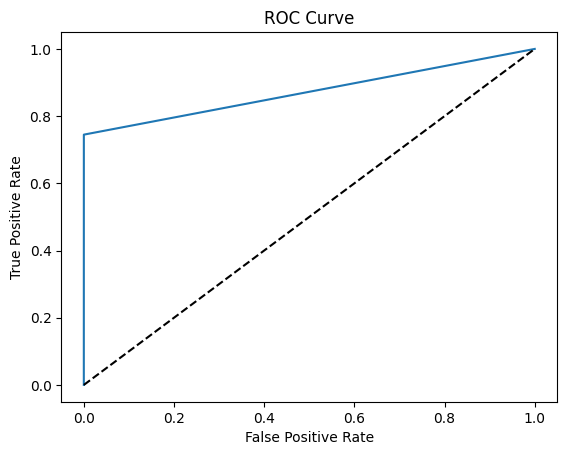

In [121]:
plot_roc_curve(y_test, y_pred)

## Support Vector Machine

1. SMOTE

In [122]:
SVM.fit(X_train_smote, y_train_smote)
y_pred = SVM.predict(X_test)

In [123]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.15      0.88      0.26        98

    accuracy                           0.99     56962
   macro avg       0.58      0.93      0.63     56962
weighted avg       1.00      0.99      0.99     56962



In [124]:
f1_smote_SVM = f1_score(y_test, y_pred)
recall_smote_SVM = recall_score(y_test, y_pred)

print("f1-score:", f1_smote_SVM)
print("recall:", recall_smote_SVM)

f1-score: 0.2633996937212863
recall: 0.8775510204081632


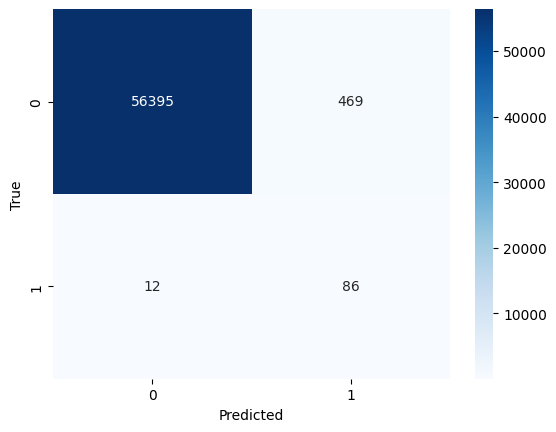

In [125]:
plot_confusion_matrix(y_test, y_pred)

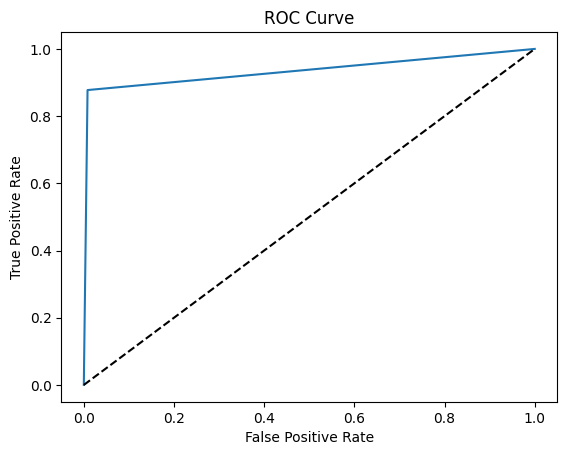

In [126]:
plot_roc_curve(y_test, y_pred)

2. class_weight

In [127]:
SVM_cw.fit(X_train, y_train)
y_pred = SVM_cw.predict(X_test)

In [128]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.25      0.82      0.38        98

    accuracy                           1.00     56962
   macro avg       0.62      0.91      0.69     56962
weighted avg       1.00      1.00      1.00     56962



In [129]:
f1_cw_SVM = f1_score(y_test, y_pred)
recall_cw_SVM = recall_score(y_test, y_pred)

print("f1-score:", f1_cw_SVM)
print("recall:", recall_cw_SVM)

f1-score: 0.3818615751789976
recall: 0.8163265306122449


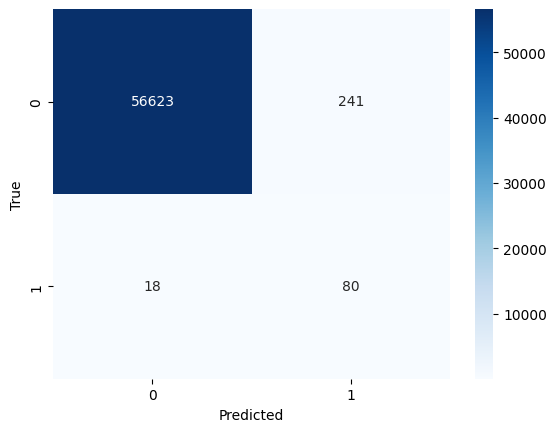

In [130]:
plot_confusion_matrix(y_test, y_pred)

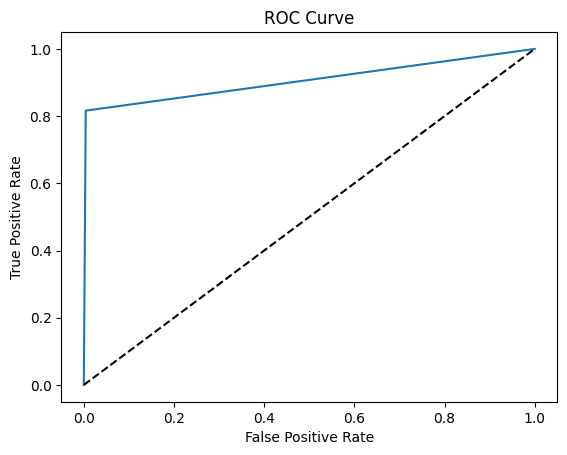

In [131]:
plot_roc_curve(y_test, y_pred)

## XGBClassifier

1. SMOTE

In [132]:
XGB.fit(X_train_smote, y_train_smote)
y_pred = XGB.predict(X_test)

In [133]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.88      0.84        98

    accuracy                           1.00     56962
   macro avg       0.90      0.94      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [134]:
f1_smote_XGB = f1_score(y_test, y_pred)
recall_smote_XGB = recall_score(y_test, y_pred)

print("f1-score:", f1_smote_XGB)
print("recall:", recall_smote_XGB)

f1-score: 0.8390243902439024
recall: 0.8775510204081632


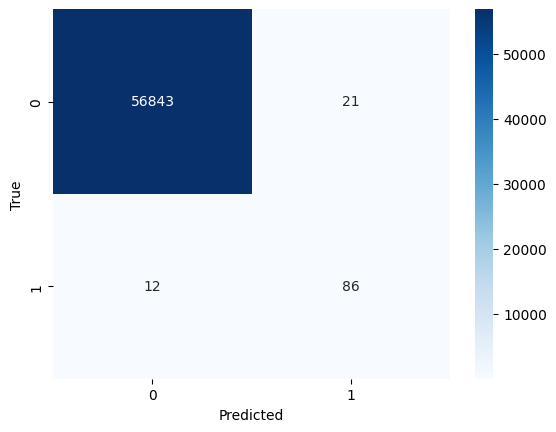

In [135]:
plot_confusion_matrix(y_test, y_pred)

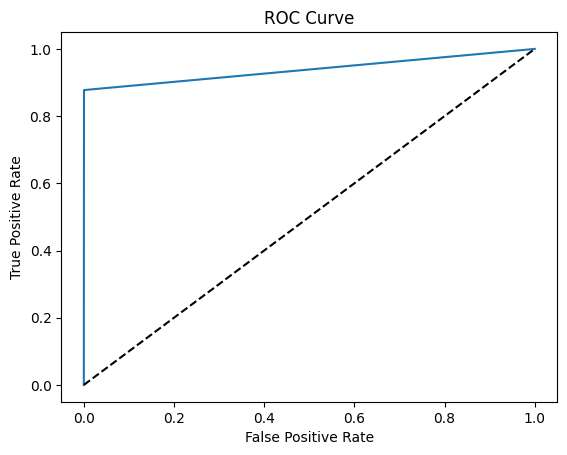

In [136]:
plot_roc_curve(y_test, y_pred)

2. class_weight

In [180]:
XGB_cw.fit(X_train, y_train)
y_pred = XGB_cw.predict(X_test)

In [181]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.85      0.86        98

    accuracy                           1.00     56962
   macro avg       0.94      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [182]:
f1_cw_XGB = f1_score(y_test, y_pred)
recall_cw_XGB = recall_score(y_test, y_pred)

print("f1-score:", f1_cw_XGB)
print("recall:", recall_cw_XGB)

f1-score: 0.8601036269430051
recall: 0.8469387755102041


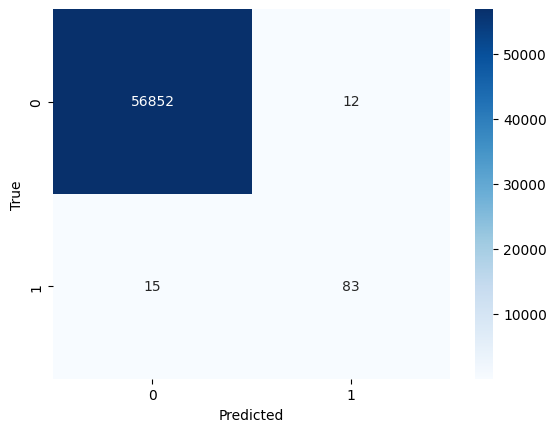

In [183]:
plot_confusion_matrix(y_test, y_pred)

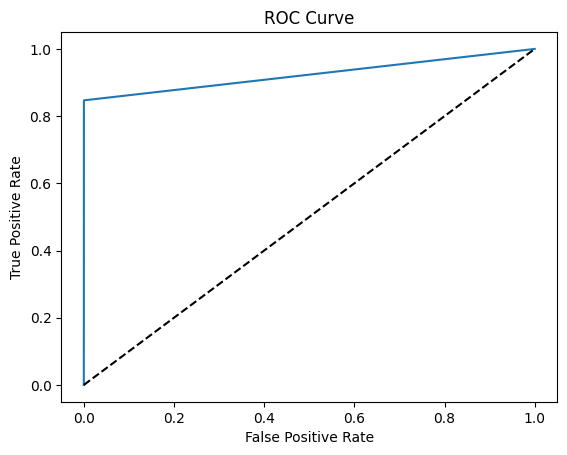

In [184]:
plot_roc_curve(y_test, y_pred)

## Neural Networdk

1. SMOTE

In [142]:
input_shape = X_train_smote.shape[1]

In [143]:
smote_model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

smote_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [144]:
smote_history = smote_model.fit(X_train_smote, y_train_smote, validation_split=0.2, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
11373/11373 [==============================] - 40s 3ms/step - loss: 0.0150 - accuracy: 0.9954 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 2/10
11373/11373 [==============================] - 38s 3ms/step - loss: 0.0054 - accuracy: 0.9987 - val_loss: 8.9868e-04 - val_accuracy: 0.9999
Epoch 3/10
11373/11373 [==============================] - 41s 4ms/step - loss: 0.0042 - accuracy: 0.9990 - val_loss: 0.0017 - val_accuracy: 0.9998
Epoch 4/10
11373/11373 [==============================] - 36s 3ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 2.2023e-04 - val_accuracy: 1.0000
Epoch 5/10
11373/11373 [==============================] - 41s 4ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 0.0019 - val_accuracy: 0.9999
Epoch 6/10
11373/11373 [==============================] - 37s 3ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 8.8752e-04 - val_accuracy: 0.9998
Epoch 7/10
11373/11373 [==============================] - 37s 3ms/step - loss: 0.0023 - accuracy: 0.9995 -

In [145]:
y_pred = smote_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

1781/1781 [==============================] - 4s 2ms/step


In [146]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.75      0.84      0.79        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



In [147]:
f1_smote_NN = f1_score(y_test, y_pred)
recall_smote_NN = recall_score(y_test, y_pred)

print("f1-score:", f1_smote_NN)
print("recall:", recall_smote_NN)

f1-score: 0.7884615384615385
recall: 0.8367346938775511


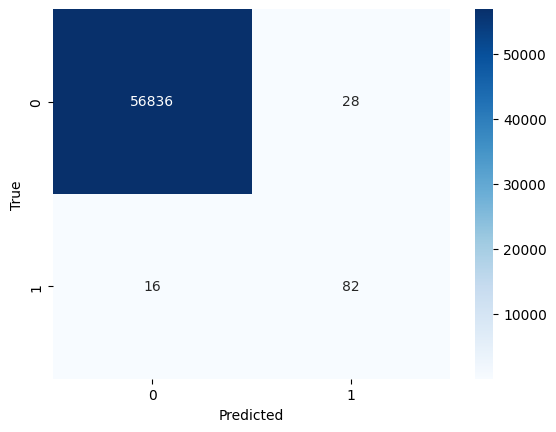

In [148]:
plot_confusion_matrix(y_test, y_pred)

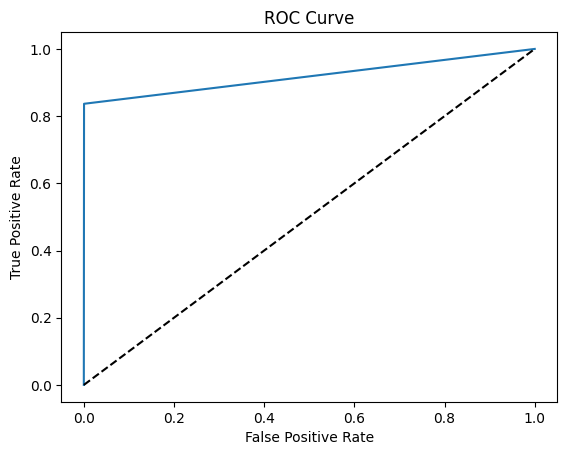

In [149]:
plot_roc_curve(y_test, y_pred)

2. 원본 데이터

In [150]:
input_shape = X_train.shape[1]

In [151]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(input_shape,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [152]:
weight_0 = y_train.value_counts()[0] / len(y_train)
weight_1 = y_train.value_counts()[1] / len(y_train)

class_weight = {0: weight_0, 1: weight_1}

In [153]:
model_history = model.fit(X_train, y_train, validation_split=0.2, class_weight=class_weight, epochs=10, batch_size=32, shuffle=True)

Epoch 1/10
5697/5697 [==============================] - 24s 4ms/step - loss: 0.0011 - accuracy: 0.9982 - val_loss: 0.0121 - val_accuracy: 0.9982
Epoch 2/10
5697/5697 [==============================] - 18s 3ms/step - loss: 3.4491e-05 - accuracy: 0.9983 - val_loss: 0.0199 - val_accuracy: 0.9982
Epoch 3/10
5697/5697 [==============================] - 20s 4ms/step - loss: 1.1462e-04 - accuracy: 0.9987 - val_loss: 0.0328 - val_accuracy: 0.9982
Epoch 4/10
5697/5697 [==============================] - 20s 4ms/step - loss: 8.2211e-05 - accuracy: 0.9985 - val_loss: 0.0116 - val_accuracy: 0.9986
Epoch 5/10
5697/5697 [==============================] - 20s 3ms/step - loss: 1.7398e-04 - accuracy: 0.9985 - val_loss: 0.0408 - val_accuracy: 0.9982
Epoch 6/10
5697/5697 [==============================] - 20s 3ms/step - loss: 1.8134e-04 - accuracy: 0.9987 - val_loss: 0.1339 - val_accuracy: 0.9982
Epoch 7/10
5697/5697 [==============================] - 21s 4ms/step - loss: 1.5936e-04 - accuracy: 0.9986 - v

In [154]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

1781/1781 [==============================] - 3s 2ms/step


In [155]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.82      0.68      0.74        98

    accuracy                           1.00     56962
   macro avg       0.91      0.84      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [156]:
f1_cw_NN = f1_score(y_test, y_pred)
recall_cw_NN = recall_score(y_test, y_pred)

print("f1-score:", f1_cw_NN)
print("recall:", recall_cw_NN)

f1-score: 0.7444444444444445
recall: 0.6836734693877551


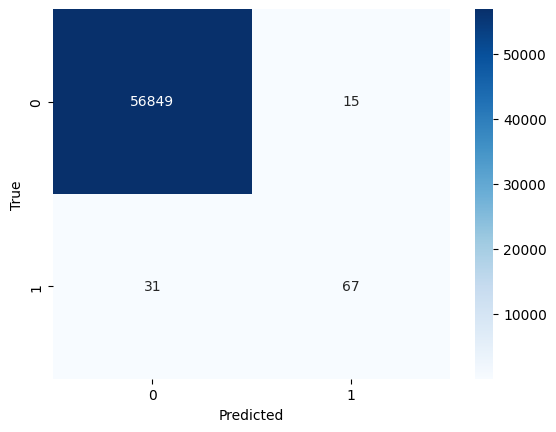

In [157]:
plot_confusion_matrix(y_test, y_pred)

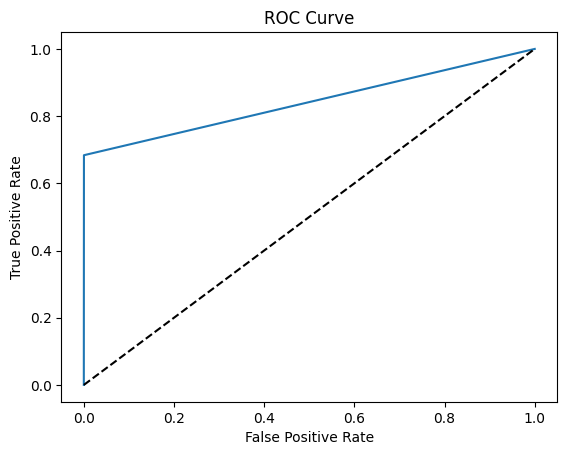

In [158]:
plot_roc_curve(y_test, y_pred)

## Select Model

In [185]:
#score 비교를 위한 dataframe 생성
score = pd.DataFrame({
    'MODEL': ["Logistic Regression", "RandomForestClassifier", "SupportVectorMachine", "XGBClassifier", "Neural Network"],
    'SMOTE_f1-score': [f1_smote_LR, f1_smote_RF, f1_smote_SVM, f1_smote_XGB, f1_smote_NN],
    'SMOTE_recall': [recall_smote_LR, recall_smote_RF, recall_smote_SVM, recall_smote_XGB, recall_smote_NN],
    'CLASS_WEIGHT_f1-score': [f1_cw_LR, f1_cw_RF, f1_cw_SVM, f1_cw_XGB, f1_cw_NN],
    'CLASS_WEIGHT_recall': [recall_cw_LR, recall_cw_RF, recall_cw_SVM, recall_cw_XGB, recall_cw_NN]
})

score = score.set_index('MODEL')

score

,SMOTE_f1-score,SMOTE_recall,CLASS_WEIGHT_f1-score,CLASS_WEIGHT_recall
MODEL,,,,
Logistic Regression,0.142628,0.908163,0.125352,0.908163
RandomForestClassifier,0.846939,0.846939,0.834286,0.744898
SupportVectorMachine,0.263400,0.877551,0.381862,0.816327
XGBClassifier,0.839024,0.877551,0.860104,0.846939
Neural Network,0.788462,0.836735,0.744444,0.683673


In [207]:
#bar graph
fig1 = px.bar(score, x=score.index, y=['SMOTE_f1-score', 'CLASS_WEIGHT_f1-score'],
              barmode='group', labels={'value': 'SCORE', 'variable': 'METRIC'},
              title='f1-score by model')

fig2 = px.bar(score, x=score.index, y=['SMOTE_recall', 'CLASS_WEIGHT_recall'],
              barmode='group', labels={'value': 'SCORE', 'variable': 'METRIC'},
              title='recall by model')

fig1.show()
fig2.show()

*github 업로드 그래프 이미지*

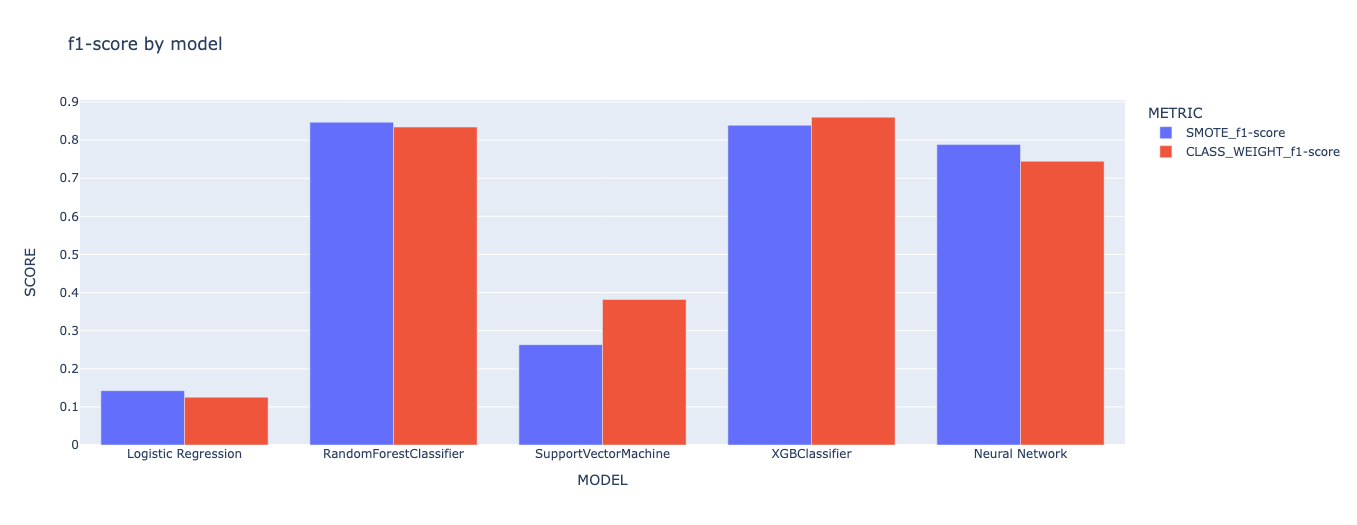

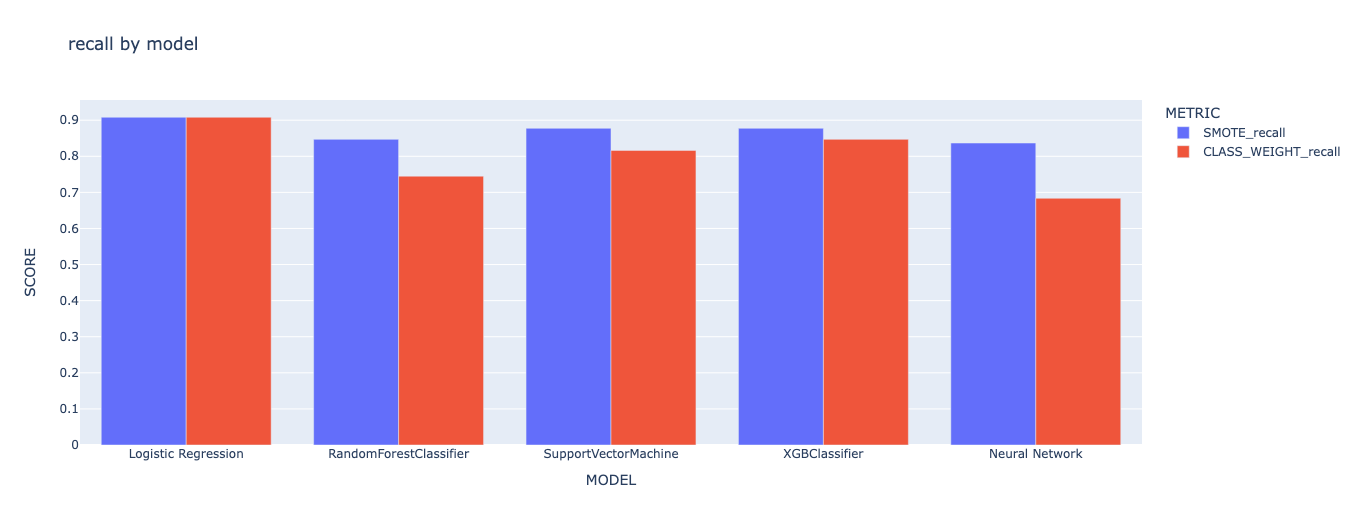

**최종 선택 모델: XGBClassifier**\
f1-score의 경우 RandomForestClassifier 와 XGBClassifier가 비슷하지만 recall 점수와 함께 고려하는 경우 XGBClassifier 가 더 높기 때문에 XGBClassifier를 최종 예측 모델로 선택하였다.

# Tuning Hyperparameter

**GridSearCV를 활용하여 하이퍼파라미터 튜닝을 진행하기로 한다. \
다만, SMOTE 를 적용한 데이터의 경우 오버샘플링으로 인해 데이터의 양이 증가하여 연산 소요 시간이 오래 걸리기 때문에 기존 데이터를 활용하고 class weight를 설정한 모델을 활용하기로 한다.**

In [187]:
from sklearn.model_selection import GridSearchCV

In [188]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [100, 200, 300],
    'gamma': [0, 0.01, 0.1, 0.3],
    'max_depth': [3, 6, 9]
}

In [189]:
grid_search = GridSearchCV(estimator=XGB_cw, param_grid=param_grid, cv=5, verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'gamma': [0, 0.01, 0.1, 0.3],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 6, 9],
                         'n_estimators': [100, 200, 300]})

In [190]:
print("Best parameter :", grid_search.best_params_)
print("Best score :", grid_search.best_score_, 3)

Best parameter : {'gamma': 0.01, 'learning_rate': 0.3, 'max_depth': 6, 'n_estimators': 300}
Best score : 0.9995391603941275 3


In [191]:
estimator = grid_search.best_estimator_
y_pred = estimator.predict(X_test)

In [192]:
cm_report = classification_report(y_test, y_pred)
print(cm_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.85      0.87        98

    accuracy                           1.00     56962
   macro avg       0.95      0.92      0.93     56962
weighted avg       1.00      1.00      1.00     56962



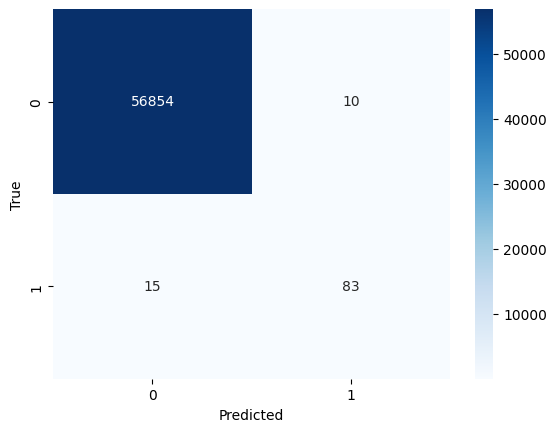

In [193]:
plot_confusion_matrix(y_test, y_pred)

In [194]:
f1_score = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("f1-score:", f1_score)
print("recall:", recall)

f1-score: 0.8691099476439791
recall: 0.8469387755102041


In [199]:
#기존 모델과 수정된 모델 성능 비교
xgb_score = pd.DataFrame({
    'MODEL': ["XGBClassifier", "XGBClassifier_best_estimator"],
    'f1-score': [f1_cw_XGB, f1_score],
    'recall': [recall_cw_XGB, recall]
})

fig = px.bar(xgb_score, x='MODEL', y = ["f1-score", "recall"], barmode = 'group',
             labels = {'value': 'SCORE', 'variable': 'Metric'},
             title = "Comparison score btw basic XGB and tuned XGB")
fig.show()

*github 업로드 그래프 이미지*

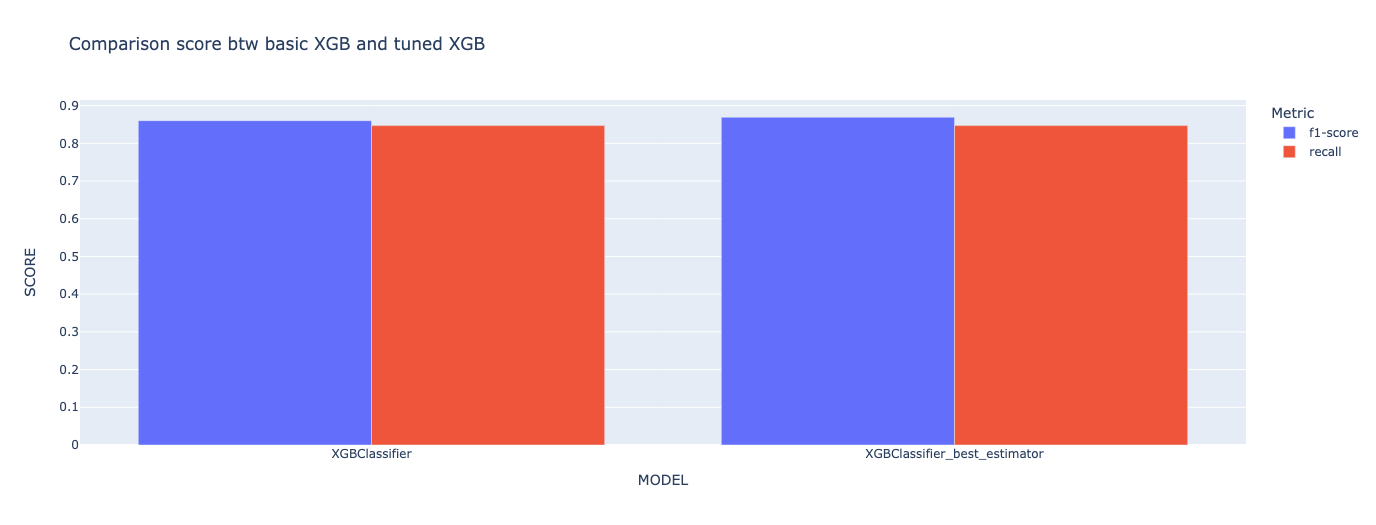

- **하이퍼파라미터가 조정된 XGBClassifier는 기존의 모델보다 f1-score가 대략 0.001 상승한 것을 확인할 수 있다. 하지만 recall 점수는 이전과 동일한 결과를 보여준다.**

# Conclusion

**1. 데이터 불균형 문제**\
DATA 불균형 문제를 해결하기 위해 oversampling(SMOTE)과 class_weight를 활용한 훈련 모델의 f1-score와 recall 을 비교하였다. 모델에 따라 향상된 성능을 보이는 데이터는 달랐지만, 전반적으로 두 데이터를 활용한 모델 성능에 큰 차이가 나진 않는 것을 확인하였다. 따라서, 연산시간과 연산 역량에 따라 데이터 불균형 문제를 알맞게 해결하는 것이 필요하다.

**2. 모델 선택**\
모델 선택에 있어서 앙상블 학습 기법을 사용하는 RandomForestClassifier 와 XGBClassifier가 가 비슷한 점수로 다른 모델들에 비해 성능이 좋은 것으로 확인되었다. 이는 여러개의 기본모델이 결합된 앙상블 학습이 각 모델의 단점을 다른 모델로 보완하고, 과적합을 줄이는 기능을 하기 때문이라고 볼 수 있다.


**3. 하이퍼파라미터 튜닝**\
하이퍼파라미터 튜닝 후 진행한 모델의 성능이 이전의 모델에서 크게 향상한 모습을 보여주지 않는다. GridSearchCV 를 위해 설정한 파라미터의 종류와 값을 수정하여 확인하는 것이 필요해 보인다. 또한, Oversampling을 사용한다면 향상될 가능성이 있는 지 확인할 필요가 있다.